In [ ]:
!pip install numpy

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
import numpy as np
import torch
import torch.nn as nn

import transformers

In [ ]:
state, action, return_to_go = [], [], []

In [ ]:
time_step = []

In [ ]:
num_actions = 34
num_states = 8 * 5 + 2

## 노가다 작업은 json으로 미리 저장하기

In [ ]:
import json

In [ ]:
action_input_list = ['Wait', 'W', 'A', 'S', 'D',
                     'WA', 'WD', 'SD', 'SA',
                     'Ws', 'As', 'Ss', 'Ds',
                     'WAs', 'WDs', 'SDs', 'SAs',
                     'Wj', 'Aj', 'Sj', 'Dj',
                     'WAj', 'WDj', 'SDj', 'SAj',
                     'Wsj', 'Asj', 'Ssj', 'Dsj',
                     'WAsj', 'WDsj', 'SDsj', 'SAsj']
num_action_input = len(action_input_list)

In [ ]:
action_ids = {}
for id in range(num_action_input):
    action_ids[action_input_list[id]] = id

In [ ]:
print(action_ids)

In [ ]:
with open('json/action_ids.json', 'w', encoding='utf-8') as f:
    json.dump(action_ids, f, ensure_ascii=False, indent='\t')

In [ ]:
state_position_list = ['field', 'wall', 'lowair', 'highair']
state_stamina_list = ['0-19', '20-39', '40-59', '60-79', '80-100']
state_special_list = ['death', 'goal']

num_state_position_list = len(state_position_list)
num_state_stamina_list = len(state_stamina_list)
num_state_special_list = len(state_special_list)

num_state_ids = num_state_position_list * num_state_stamina_list + num_state_special_list

In [ ]:
state_ids = {}
state_id_value = 0
for position in state_position_list:
    sub_state = {}
    for stamina in state_stamina_list:
        sub_state[stamina] = state_id_value
        state_id_value += 1
    state_ids[position] = sub_state
    
for special in state_special_list:
    state_ids[special] = state_id_value
    state_id_value += 1

In [ ]:
print(state_ids)

In [ ]:
with open('json/state_ids.json', 'w', encoding='utf-8') as f:
    json.dump(state_ids, f, ensure_ascii=False, indent='\t')

## 불러와서 시작

In [ ]:
import json

with open('json/state_ids.json', 'r') as f:
    state_ids = json.load(f)

with open('json/action_ids.json', 'r') as f:
    action_ids = json.load(f)
    
print(state_ids)
print(len(state_ids['field']))

num_states = 0
for state in state_ids.keys():
    if type(state_ids[state]) != int:
        num_states += len(state_ids[state])
    else:
        num_states += state_ids[state]
num_actions = len(action_ids)

print(num_states, num_actions)
print(action_ids)

Gaussian reference : https://codetorial.net/articles/normal_distribution.html

### initialize the map

In [ ]:
map_info = np.zeros((100,100),dtype=np.float64)
print(map_info)

In [ ]:
import math
# a : tangent of gaussian distribution
# mu : mean, np.array([x, y])
# radius_x : radius of x position of mean point
# radius_y : radius of y position of mean point
# s_2 : variance
def gaussian(scale, mu, radius_x, radius_y, s_2):
    global map_info
    centre_x, centre_y = mu[0], mu[1]
    for x in range(centre_x - radius_x, centre_x + radius_x):
        for y in range(centre_y - radius_y, centre_y + radius_y):
            if x < 0 or y < 0 or x >= 100 or y >= 100:
                continue
            X = np.array([x, y])
            g = scale * math.pow(math.e, -np.dot(X - mu, X - mu)/pow(s_2, 2))
            g = g if g <= 20.0 else 20.0
            map_info[x,y] = g
    

In [ ]:
# test
a = np.array([1,2])
b = np.array([3,4])
c = np.dot(a,b)

print(c, a[0])
print(math.pow(2,4))
print(np.array([[2,3],[4,1]]))

In [ ]:
x = np.random.randint(1, 100, 10)
y = np.random.randint(1, 100, 10)
print(x)
print(y)

In [ ]:
for mu in zip(x, y):
    radius_x = np.random.randint(10, 30) # 구릉의 반경 x방향
    radius_y = np.random.randint(10, 30) # 구릉의 반경 y방향
    s_2 = np.random.rand() + np.random.randint(8, 13) # variance. 크기가 클수록 넓은 범위가 됨
    print(s_2)
    g = gaussian(30, np.array(mu), radius_x, radius_y, s_2) # 20 : 최대 높이

### for saving and loading
현재 12개까지 만듦 - 23, Sep., 21

In [ ]:
import pickle

with open('pkl/map_info_2.pkl', 'wb') as f:
    pickle.dump(map_info, f)

In [ ]:
import pickle
with open('pkl/map_info_2.pkl', 'rb') as f:
    map_info = pickle.load(f)

In [ ]:
import os

n = os.listdir('pkl\\')
print(n)

In [ ]:
print(map_info)

In [ ]:
x = np.random.randint(1, 100, 10)
y = np.random.randint(1, 100, 10)

for mu in zip(x, y):
    radius_x = np.random.randint(10, 30) # 구릉의 반경 x방향
    radius_y = np.random.randint(10, 30) # 구릉의 반경 y방향
    s_2 = np.random.rand() + np.random.randint(8, 13) # variance. 크기가 클수록 넓은 범위가 됨
    print(s_2)
    g = gaussian(30, np.array(mu), radius_x, radius_y, s_2) # 20 : 최대 높이

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.array([i for i in range(100)])
X = np.tile(X, (100,1))
Y = np.transpose(X)

ax.plot_surface(X, Y, map_info)
ax.set_zlim(-10, 50)

plt.tight_layout()
plt.show()

# 3D Path Finder on gravitial world

## modularization

In [1]:
import sys
import pathlib

path = str(pathlib.Path().absolute())
path += '\py'

if path not in sys.path:
    sys.path.insert(0,path)
    print('path insert succeeded.')

path insert succeeded.


In [2]:
from map_designer import *
from map_designer import MapDesigner as MD

In [3]:
md = MD('pkl/maps/')

1/2


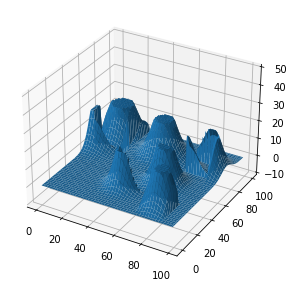

2/2


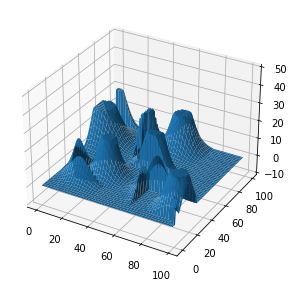

In [4]:
md.plot(n=2)

### (optional) more generate maps

In [ ]:
for _ in range(10):
    md.gen_gaussian_map_info()

In [ ]:
md.plot(n=len(md.map_list))

In [ ]:
md.save()

In [4]:
import json

with open('json/state_ids.json', 'r') as f:
    state_ids = json.load(f)

with open('json/action_ids.json', 'r') as f:
    action_ids = json.load(f)
    
print(state_ids)
print(len(state_ids['field']))

num_states = 0
for state in state_ids.keys():
    if type(state_ids[state]) != int:
        num_states += len(state_ids[state])
    else:
        num_states += state_ids[state]
num_actions = len(action_ids)

print(num_states, num_actions)
print(action_ids)

{'field': {'0-19': 0, '20-39': 1, '40-59': 2, '60-79': 3, '80-100': 4}, 'wall': {'0-19': 5, '20-39': 6, '40-59': 7, '60-79': 8, '80-100': 9}, 'parachute': {'0-19': 10, '20-39': 11, '40-59': 12, '60-79': 13, '80-100': 14}, 'air': {'0-19': 15, '20-39': 16, '40-59': 17, '60-79': 18, '80-100': 19}, 'death': 20, 'goal': 21}
5
61 33
{'Wait': 0, 'W': 1, 'A': 2, 'S': 3, 'D': 4, 'WA': 5, 'WD': 6, 'SD': 7, 'SA': 8, 'Ws': 9, 'As': 10, 'Ss': 11, 'Ds': 12, 'WAs': 13, 'WDs': 14, 'SDs': 15, 'SAs': 16, 'Wj': 17, 'Aj': 18, 'Sj': 19, 'Dj': 20, 'WAj': 21, 'WDj': 22, 'SDj': 23, 'SAj': 24, 'Wsj': 25, 'Asj': 26, 'Ssj': 27, 'Dsj': 28, 'WAsj': 29, 'WDsj': 30, 'SDsj': 31, 'SAsj': 32}


In [5]:
from environment import *

In [17]:
my_agent = Agent(stamina=200)

In [18]:
init_agent_dir = np.array([np.random.uniform(-1, 1), 0., np.random.uniform(-1, 1)])
init_agent_dir = norm(init_agent_dir)
print(init_agent_dir)
my_agent.dir = init_agent_dir

[-0.59970403  0.          0.80022189]


In [19]:
with open('pkl/data/my_agent.pkl', 'wb') as f:
    pickle.dump(my_agent, f)

In [20]:
with open('pkl/data/my_agent.pkl', 'rb') as f:
    my_agent = pickle.load(f)

In [21]:
goal_pos = np.array([50, md.map_list[0][50, 50], 50])
print(goal_pos)

[50.          0.09353686 50.        ]


In [22]:
my_env = Environment(agent=my_agent, map_info=md.map_list[0], goal_position=goal_pos,
            num_states=num_states, num_actions=num_actions,
            state_ids=state_ids, action_ids=action_ids,
            consume_stamina_info=None,
            fall_damage=10,
            fall_min_height=6)

In [23]:
with open('pkl/data/my_env.pkl', 'wb') as f:
    pickle.dump(my_env, f)

In [24]:
with open('pkl/data/my_env.pkl', 'rb') as f:
    my_env = pickle.load(f)

In [25]:
dataset = my_env.make_scenarios()

In [26]:
for s in dataset:
    for i in range(len(s)):
        print(s[i][0])

-0.0
28.00934260381633
-28.284832911436013
0.6109056474575993
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142
0.05992503221823142


In [27]:
for s in dataset:
    print(s)

[(-0.0, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA0>), (28.00934260381633, <state.State object at 0x000001AF27455640>, <action.Action object at 0x000001AF2611BCA0>), (-28.284832911436013, <state.State object at 0x000001AF27455130>, <action.Action object at 0x000001AF2611BCA0>), (0.6109056474575993, <state.State object at 0x000001AF274558E0>, <action.Action object at 0x000001AF2611BCA0>)]
[(0.05992503221823142, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA0>)]
[(0.05992503221823142, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA0>)]
[(0.05992503221823142, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA0>)]
[(0.05992503221823142, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA0>)]
[(0.05992503221823142, <state.State object at 0x000001AF23EB0880>, <action.Action object at 0x000001AF2611BCA

In [29]:
print(my_env.agent.get_current_position())
print(my_env.goal_position)

[0. 0. 0.]
[50.          0.09353686 50.        ]


In [ ]:
a = np.array([[1,2], [3, 5]])

In [ ]:
print(a[0, 1], a[0][1])